$\huge \text{Which factors influence the life expectancy of a country?}$

$\large \text{by Aliza Reif (s1054720) and David Moser (s1051845)}$


# Abstract

This data analysis studies the influence of different factors on the life expectancy in a country. The 18 variables dealt with in this research are for example the development status of a country, the years of education, the gross national income, the location and happiness. It can be concluded that factors such as the human development index, the mean years of education, and the happiness score from the World Happiness Report as well as some of the predictors for the happiness score like trust in the government, health or freedom show indeed significant evidence that they can be used as predictors for life expectancy. The variables gross national income per capita or the economy variable from the World Happiness Report are no significant predictors. The location has only proven itself to be significant in the case of the regions Southeastern Asia and Australia and New Zealand. 

# Introduction

There exist many factors that can influence the life expectancy at birth in years in a country. The purpose of our research is to obtain knowledge about which factors influence the life expectancy in a country and how these factors can be used to predict the life expectancy. Factors than can influence life expectancy are for example the status as a developing or developed country, the gross national income, the education, the location and happiness. Evidently, this research focusses on social and economic predictors for life expectancy, and less on factors that influence an individual's health. 

Some questions that can be raised based on this research include: Does the human development index of a country correlate with its life expectancy? Does income have an influence on life expectancy? Does education influence life expectancy? Does more happiness lead to higher life expectancy? Does the location of a country influence its life expectancy?

The answer to these question might in the future help to improve the life expectancy in countries where said life expectancy is low, by aiming at improving the concepts that are established to be able to significantly predict the life expectancy. 

We were especially interested in the influence of happiness on life expectancy, as our research focussed on the ability to predict life expectancy based on social and economic factors. To justify our inclusion of happiness as a predictor of life expectancy, we tested the following hypotheses:

The null hypothesis is that happiness does not influence life expectancy. Thus, the alternative hypothesis is that a difference in the happiness score leads to a difference in life expectancy.

$H_0$: $\mu_{\text{high happiness}} = \mu_{\text{low happiness}}$

$H_1$: $\mu_{\text{high happiness}} \neq \mu_{\text{low happiness}}$

Based on this, we established the following hypotheses for our multiple regression model:

$H_0$: The average life expectancy of a country cannot be predicted by variables such as the human development index, years of education, the gross national income per capita, the location and the happiness. 

$H_1$: The average life expectancy of a country can be predicted by variables such as the human development index, years of education, the gross national income per capita, the location and the happiness. 

Generally, this means that for each explanatory variable, we need to test if, given that all other variables are included, the variable provides information that helps the model to make a better prediction of life expectancy. 
For each of the dependent variables, it is necessary to test these hypotheses, where $\beta_{i}$ is the coefficient of each variable $i$ respectively: 

$H_0: \beta_{i} = 0$, when the other variables are included in the model. 

$H_1: \beta_{i} \neq 0$, when the other variables are included in the model. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import probplot

sns.set_style("whitegrid")

ModuleNotFoundError: No module named 'seaborn'

# Dataset

The first dataset that we intended to use for this study contains the data of 195 countries from the year 2015, recording a total of 7 variables that can have an influence on the human development index and the life expectancy. The dataset can be found on Kaggle under this URL: https://www.kaggle.com/undp/human-development?select=human_development.csv . Our aim is to use this dataset to generalize about all countries in the world independent of the year of the research. The data was made available by the United Nations. 

The second dataset contained data of 158 countries of the World Happiness Report in 2015, recording 11 variables that have an influence on the happiness score. The dataset can be found on Kaggle under this URL: https://www.kaggle.com/unsdsn/world-happiness . Our aim is to use this dataset to generalize about all countries in the world independent of the year of the research. The dataset uses data from the Gallup World Poll, from which a yearly World Happiness Report is interpreted. 

We merged the datasets based on the concordant countries. Countries that did not appear on both datasets had to be removed. 138 countries remained in the merged dataset. 

The response variable of our study is the life expectancy at birth, measured in years. 

In [ ]:
# load datasets
human_develop = pd.read_csv('human_development.csv')
happiness_report = pd.read_csv('2015.csv')

# merge datasets
merged = pd.merge(human_develop, happiness_report)
merged["Gross_National_Income_per_Capita"] = merged["Gross_National_Income_per_Capita"].str.replace(",", "").astype(int)
merged

,HDI_Rank,Country,Human_Development_Index,Life_Expectancy_at_Birth,Expected_Years_of_Education,Mean_Years_of_Education,Gross_National_Income_per_Capita,GNI_per_Capita_Rank_Minus_HDI_Rank,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,1.0,Norway,0.944,81.6,17.5,12.6,64992,5.0,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
1,2.0,Australia,0.935,82.4,20.2,13.0,42261,17.0,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
2,3.0,Switzerland,0.930,83.0,15.8,12.8,56431,6.0,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
3,4.0,Denmark,0.923,80.2,18.7,12.7,44025,11.0,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,5.0,Netherlands,0.922,81.6,17.9,11.9,45435,9.0,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,183.0,Burkina Faso,0.402,58.7,7.8,1.4,1591,-13.0,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
134,184.0,Burundi,0.400,56.7,10.1,2.7,758,1.0,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
135,185.0,Chad,0.392,51.6,7.4,1.9,2085,-22.0,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
136,187.0,Central African Republic,0.350,50.7,7.2,4.2,581,1.0,Sub-Saharan Africa,148,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230


## Response variable

Univariate Analysis of Life Expectancy:
count    138.000000
mean      71.357971
std        8.768522
min       49.000000
25%       64.650000
50%       74.100000
75%       77.550000
max       83.500000
Name: Life_Expectancy_at_Birth, dtype: float64


Text(0.5, 1.0, 'Life expectancy at birth')

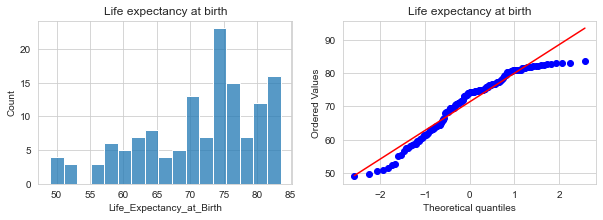

In [ ]:
# describe life expectancy variable
print("Univariate Analysis of Life Expectancy:")
print(merged['Life_Expectancy_at_Birth'].describe())

#  plot life expectancy in QQ-plot and histogram
f, axis = plt.subplots(1, 2, figsize = (10,3))
probplot(merged['Life_Expectancy_at_Birth'], plot = plt)
sns.histplot(merged['Life_Expectancy_at_Birth'], bins = 17, ax = axis[0])
axis[0].set_title("Life expectancy at birth")
axis[1].set_title("Life expectancy at birth")

Before fitting the model, we needed to ensure that the response variable, life expectancy, roughly follows a normal distribution. If that was not the case, a variable transformation would be required. As can be seen in the QQ-plot and the histogram, the variable life expectancy is approximately normally distributed. 

With a mean of 71.36 years and a median of 74.10 years life expectancy, it is evident that the dataset is slightly left-skewed. Since our dataset is relatively large as it includes 138 independent cases, and the skew is not extreme, the sampling distribution of the mean can assumed to be approximately normal, according to the Central Limit Theorem. 

## Explanatory variables

The explanatory variables, obtained from both datasets, are the following:

The human development index is a numerical variable ranging from 0 to 1, indicating the development status of a country. Corresponding to it, the dataset features the variable HDI rank, which is an ordinal ranking of the human development index. 

The expected years of education and the mean years of education are both continuously measured in years. 

The gross national income per capita is a discrete variable measured in US dollar.

The next variable is measured as GNI per capita minus HDI rank, thus indicating when a country performs better with limited resources than its development index would suggest. 

The region is a categorical variable describing where a country is located in the world. The categories are: "Western Europe", "Australia and New Zealand", "North America", "Southeastern Asia", "Middle East and Northern Africa", "Eastern Asia", "Central and Eastern Europe", "Latin America and Caribbean", "Southern Asia" and "Sub-Saharan Africa". 

The happiness rank is an ordinal variable, indicating how one country compares to others, based on their happiness score.

The happiness score is a continuous variable based on a survey taken from a representative sample of the population. The score ranges from 0 to 10 with 10 being the best possible score. It is the sum of the following variables: The economy (GDP per Capita) is a continuous variable calculated by dividing the GDP of a nation by its population. The variables Family, Health, Freedom, Trust in the government, Dystopia Residual and Generosity are continuous variables that indicate to which extent they contributed to the calculation of the happiness score. The last variable is called Dystopia Residual. Dystopia represents the lowest national averages for each key variable and is combined with the residual error as a benchmark. 

The variable standard error is the standard error of the happiness score from the happiness report dataset.

## Hyptheses on the happiness score

To verify the justification of the inclusion of the explanatory variable happiness and the variables that relate to happiness from the World Happiness Report, we decided to use a t-test to determine if there is an actual difference between the mean life expectancy for countries with high happiness scores and the mean life expectancy for countries with low happiness scores. 

Our hypotheses are thus: 

$H_0$: $\mu_{\text{high happiness}} = \mu_{\text{low happiness}}$

$H_1$: $\mu_{\text{high happiness}} \neq \mu_{\text{low happiness}}$

Since the value of the happiness score ranges from 0 to 10 points, we decided every happiness score below and including 5 to be low, and defined a high happiness as above 5 points on the happiness score. 

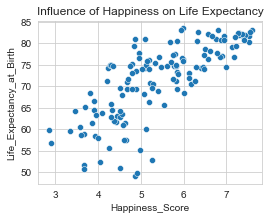

In [ ]:
# plot life expectancy against the happiness score
plt.figure(figsize=(4,3))
sns.scatterplot(x = merged['Happiness_Score'], y = merged['Life_Expectancy_at_Birth'])
plt.title("Influence of Happiness on Life Expectancy")
plt.show()

In [ ]:
# create low- and high happiness categories
low_happiness = merged[merged['Happiness_Score'] <= 5]
high_happiness = merged[merged['Happiness_Score'] > 5]

# analyze low happiness category
low_mean = low_happiness['Life_Expectancy_at_Birth'].mean()
low_std = low_happiness['Life_Expectancy_at_Birth'].std()
low_count = low_happiness['Life_Expectancy_at_Birth'].count()

# analyze high happiness category
high_mean = high_happiness['Life_Expectancy_at_Birth'].mean()
high_std = high_happiness['Life_Expectancy_at_Birth'].std()
high_count = high_happiness['Life_Expectancy_at_Birth'].count()

# print results
print("The mean life expectancy for low happiness is {:.2f} with a standard deviation of {:.2f} (countries: {}). "
      .format(low_mean, low_std, low_count))
print()
print("The mean life expectancy for high happiness is {:.2f} with a standard deviation of {:.2f} (countries: {}). "
      .format(high_mean, high_std, high_count))
print()

print(stats.ttest_ind(low_happiness['Life_Expectancy_at_Birth'], high_happiness['Life_Expectancy_at_Birth']))

NameError: name 'merged' is not defined

Since $p = 0.000 < \alpha$, the null hypothesis is rejected, and the alternative hypothesis accepted.

Thus, we can conclude that a difference in the happiness score is indeed related to a significant difference in life expectancy, and it is justified to include happiness as a predictor variable for life expectancy. 

# Fitting the model and Results

## The model

In [ ]:
# dummy variable encoding:
# reference level: Southern Asia
dummy_coding_1 = {'Western Europe': 1, 'Central and Eastern Europe': 0, 'North America': 0, 
                  'Australia and New Zealand': 0, 'Eastern Asia': 0, 'Southeastern Asia': 0, 
                  'Latin America and Caribbean': 0, 'Middle East and Northern Africa': 0, 
                  'Sub-Saharan Africa': 0, 'Southern Asia': 0}
western_europe_dummy = merged['Region'].copy()
western_europe_dummy = western_europe_dummy.replace(dummy_coding_1)
merged.insert(8, 'Western_Europe', western_europe_dummy, True)

dummy_coding_2 = {'Western Europe': 0, 'Central and Eastern Europe': 1, 'North America': 0, 
                  'Australia and New Zealand': 0, 'Eastern Asia': 0, 'Southeastern Asia': 0, 
                  'Latin America and Caribbean': 0, 'Middle East and Northern Africa': 0, 
                  'Sub-Saharan Africa': 0, 'Southern Asia': 0}
c_and_e_europe_dummy = merged['Region'].copy()
c_and_e_europe_dummy = c_and_e_europe_dummy.replace(dummy_coding_2)
merged.insert(8, 'Central_and_Eastern_Europe', c_and_e_europe_dummy, True)

dummy_coding_3 = {'Western Europe': 0, 'Central and Eastern Europe': 0, 'North America': 1, 
                  'Australia and New Zealand': 0, 'Eastern Asia': 0, 'Southeastern Asia': 0, 
                  'Latin America and Caribbean': 0, 'Middle East and Northern Africa': 0, 
                  'Sub-Saharan Africa': 0, 'Southern Asia': 0}
north_america_dummy = merged['Region'].copy()
north_america_dummy = north_america_dummy.replace(dummy_coding_3)
merged.insert(8, 'North_America', north_america_dummy, True)

dummy_coding_4 = {'Western Europe': 0, 'Central and Eastern Europe': 0, 'North America': 0, 
                  'Australia and New Zealand': 1, 'Eastern Asia': 0, 'Southeastern Asia': 0, 
                  'Latin America and Caribbean': 0, 'Middle East and Northern Africa': 0, 
                  'Sub-Saharan Africa': 0, 'Southern Asia': 0}
australia_dummy = merged['Region'].copy()
australia_dummy = australia_dummy.replace(dummy_coding_4)
merged.insert(8, 'Australia_and_New_Zealand', australia_dummy, True)

dummy_coding_5 = {'Western Europe': 0, 'Central and Eastern Europe': 0, 'North America': 0, 
                  'Australia and New Zealand': 0, 'Eastern Asia': 1, 'Southeastern Asia': 0, 
                  'Latin America and Caribbean': 0, 'Middle East and Northern Africa': 0, 
                  'Sub-Saharan Africa': 0, 'Southern Asia': 0}
eastern_asia_dummy = merged['Region'].copy()
eastern_asia_dummy = eastern_asia_dummy.replace(dummy_coding_5)
merged.insert(8, 'Eastern_Asia', eastern_asia_dummy, True)

dummy_coding_6 = {'Western Europe': 0, 'Central and Eastern Europe': 0, 'North America': 0, 
                  'Australia and New Zealand': 0, 'Eastern Asia': 0, 'Southeastern Asia': 1, 
                  'Latin America and Caribbean': 0, 'Middle East and Northern Africa': 0, 
                  'Sub-Saharan Africa': 0, 'Southern Asia': 0}
south_east_asia_dummy = merged['Region'].copy()
south_east_asia_dummy = south_east_asia_dummy.replace(dummy_coding_6)
merged.insert(8, 'Southeastern_Asia', south_east_asia_dummy, True)

dummy_coding_7 = {'Western Europe': 0, 'Central and Eastern Europe': 0, 'North America': 0, 
                  'Australia and New Zealand': 0, 'Eastern Asia': 0, 'Southeastern Asia': 0, 
                  'Latin America and Caribbean': 1, 'Middle East and Northern Africa': 0, 
                  'Sub-Saharan Africa': 0, 'Southern Asia': 0}
latin_america_dummy = merged['Region'].copy()
latin_america_dummy = latin_america_dummy.replace(dummy_coding_7)
merged.insert(8, 'Latin_America_and_Caribbean', latin_america_dummy, True)

dummy_coding_8 = {'Western Europe': 0, 'Central and Eastern Europe': 0, 'North America': 0, 
                  'Australia and New Zealand': 0, 'Eastern Asia': 0, 'Southeastern Asia': 0, 
                  'Latin America and Caribbean': 0, 'Middle East and Northern Africa': 1, 
                  'Sub-Saharan Africa': 0, 'Southern Asia': 0}
middle_east_north_africa_dummy = merged['Region'].copy()
middle_east_north_africa_dummy = middle_east_north_africa_dummy.replace(dummy_coding_8)
merged.insert(8, 'Middle_East_and_North_Africa', middle_east_north_africa_dummy, True)

dummy_coding_9 = {'Western Europe': 0, 'Central and Eastern Europe': 0, 'North America': 0, 
                  'Australia and New Zealand': 0, 'Eastern Asia': 0, 'Southeastern Asia': 0, 
                  'Latin America and Caribbean': 0, 'Middle East and Northern Africa': 0, 
                  'Sub-Saharan Africa': 1, 'Southern Asia': 0}
subsaharan_africa_dummy = merged['Region'].copy()
subsaharan_africa_dummy = subsaharan_africa_dummy.replace(dummy_coding_9)
merged.insert(8, 'Sub_Saharan_Africa', subsaharan_africa_dummy, True)

In [ ]:
#fitting the actual model
model = sm.formula.ols(formula = 'Life_Expectancy_at_Birth ~ Human_Development_Index + Expected_Years_of_Education + Mean_Years_of_Education + GNI_per_Capita_Rank_Minus_HDI_Rank + Southeastern_Asia + Australia_and_New_Zealand + Happiness_Score + Family + Health_Life_Expectancy + Freedom + Trust_Government_Corruption + Generosity + Dystopia_Residual', data = merged)
multi_reg = model.fit()
print(multi_reg.summary())

                               OLS Regression Results                               
Dep. Variable:     Life_Expectancy_at_Birth   R-squared:                       0.984
Model:                                  OLS   Adj. R-squared:                  0.983
Method:                       Least Squares   F-statistic:                     599.6
Date:                      Sat, 05 Jun 2021   Prob (F-statistic):          3.62e-105
Time:                              09:48:56   Log-Likelihood:                -208.12
No. Observations:                       138   AIC:                             444.2
Df Residuals:                           124   BIC:                             485.2
Df Model:                                13                                         
Covariance Type:                  nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

To reach this model, the explanatory variables that were considered, thus included in the full model, were: 

HDI_Rank, Human_Development_Index, Expected_Years_of_Education, Mean_Years_of_Education, Gross_National_Income_per_Capita, GNI_per_Capita_Rank_Minus_HDI_Rank, nine dummy variables for ten different region, Happiness_Rank, Happiness_Score, Economy, Family, Health, Freedom, Trust_Government_Corruption, Generosity, Dystopia_Residual

After applying the method of backwards selection based on the p-value approach, all variables remaining in the model are significant predictors for the response variable life expectancy. Thus, the hypothesis tests for these variables concluded that each of the variables is significant for predicting the life expectancy, and that indeed, life expectancy can be predicted by these variables. 

The adjusted $R^2$ value of $0.983$ emphasized that conclusion additionally, as this indicates that the model can account for $98.3\text{%}$ of the variation in the response variable. 

The life expectancy in a country can be predicted by the following multiple regression model: 

$ \widehat{\text{life expectancy}} =
\\26.2362
\\+ 117 \cdot \text{human_development_index}
\\- 1.4489 \cdot \text{expected_years_of_education}
\\- 1.8040 \cdot \text{mean_years_of_education}
\\+ 0.0654 \cdot \text{GNI_per_capita_rank_minus_HDI_rank}
\\- 1.5386 \cdot \text{Southeastern_Asia}
\\+ 2.8192 \cdot \text{Australia_and_New_Zealand}
\\- 11.7213 \cdot \text{happiness_score}
\\+ 10.9440 \cdot \text{family}
\\+ 23.0598 \cdot \text{health}
\\+ 13.3953 \cdot \text{freedom}
\\+ 12.0686 \cdot \text{trust_government_corruption}
\\+ 10.9784 \cdot \text{generosity}
\\+ 11.6928 \cdot \text{dystopia_residual}$

## Interpretation of the coefficients

This model shows the influence of each explanatory variable on life expectancy at birth, given that all other variables are held constant.

The intercept at 26.24 implies that in a country with a human development index of 0, with no education, with a GNI per capita rank minus HDI rank equal to 0, with a happiness score of 0, with no family, a health that is rated 0, no freedom, no trust in the government, no generosity and a dystopia residual of 0, that is neither in Southeastern Asia nor in Australia or New Zealand, the life expectancy is predicted to be 26.24 years. 

The life expectancy is predicted to increase by 11.7 years if the human development index increases 0.1 points. 

Life expectancy decreases by 1.45 years per year of expected education, and by 1.8 years per year of mean education in that country. 

The variable GNI_per_Capita_Rank_Minus_HDI_Rank increases life expectancy by 0.065 years when the gross national income rank of that country is higher than the human development index rank, and decreases life expectancy by 0.065 years when the GNI rank is lower than the HDI rank. 

The regional variable only influences the predicted life expectancy in the cases of Southeastern Asia and Australia and New Zealand, where a country in Southeastern Asia has a life expectancy of 1.53 years less than other regions, while Australia and New Zealand have a life expectancy of 2.82 years more than other regions. 

For each point on the happiness score, the life expectancy decreases by 11.72 years, for each point of the variable family, it increases by 10.94 years. 

Likewise, the variable health increases life expectancy by 23.06 years per point, freedom increases it by 13.4 years per point, trust increases life expectancy by 12.07 years per point, generosity increases it by 10.98 years per point, and lastly, the variable dystopia residual also increases the life expectancy by 11.69 years per point. 

Each of these values only holds given that all other variables are held constant. 

## Model diagnostics check

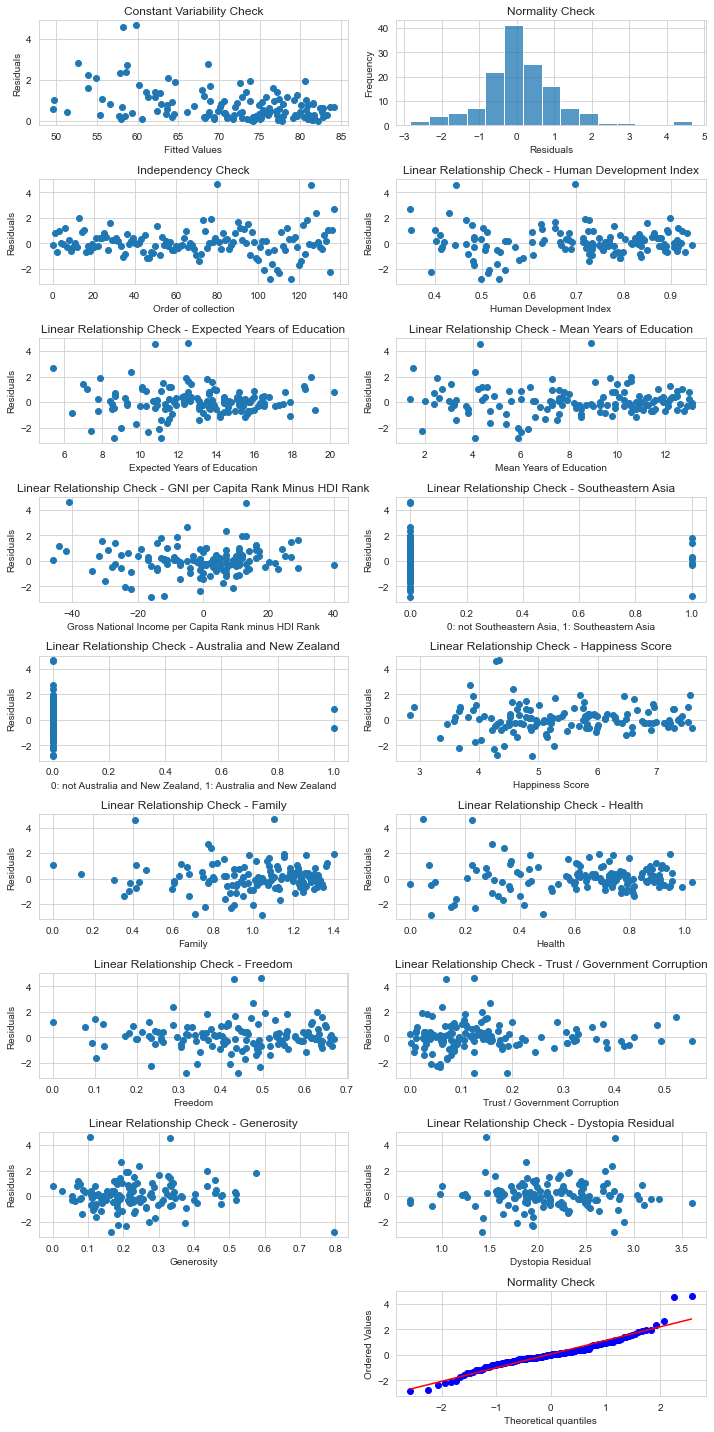

In [ ]:
# multiple regression model diagnostics
f, axes = plt.subplots(9, 2, figsize = (10,20))
fitted = (26.2362 + 117 * merged['Human_Development_Index'] - 1.4489 * merged['Expected_Years_of_Education'] 
          - 1.8040 * merged['Mean_Years_of_Education'] + 0.0654 * merged['GNI_per_Capita_Rank_Minus_HDI_Rank'] 
          - 1.5386 * merged['Southeastern_Asia'] + 2.8192 * merged['Australia_and_New_Zealand'] 
          - 11.7213 * merged['Happiness_Score'] + 10.9440 * merged['Family'] + 23.0598 * merged['Health_Life_Expectancy'] 
          + 13.3953 * merged['Freedom'] + 12.0686 * merged['Trust_Government_Corruption'] + 10.9784 * merged['Generosity'] 
          + 11.6928 * merged['Dystopia_Residual'])

# Residuals          
residuals = merged['Life_Expectancy_at_Birth'] - fitted
abs_residuals = residuals.abs()

# constant variability check:
axes[0, 0].scatter(fitted, abs_residuals)
axes[0, 0].set_ylabel("Residuals")
axes[0, 0].set_xlabel("Fitted Values")
axes[0, 0].set_title("Constant Variability Check")

# Normality check:

# Histogram
sns.histplot(data = residuals, kde=False, bins = 15, ax=axes[0, 1])
axes[0, 1].set_xlabel("Residuals")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_title("Normality Check")
# QQ-Plot(axis 8)
probplot(residuals, plot=plt)
axes[8, 1].set_title("Normality Check")

# Independency Check
counter = []
for i in range(merged['Life_Expectancy_at_Birth'].count()):
    counter.append(i)
merged['case_nr'] = counter
axes[1, 0].scatter(merged['case_nr'], residuals, label = "Independency Check")
axes[1, 0].set_xlabel("Order of collection")
axes[1, 0].set_ylabel("Residuals")
axes[1, 0].set_title("Independency Check")

# Linear relationship Check
axes[1, 1].scatter(merged['Human_Development_Index'], residuals)
axes[1, 1].set_xlabel("Human Development Index")
axes[1, 1].set_ylabel("Residuals")
axes[1, 1].set_title("Linear Relationship Check - Human Development Index")

axes[2, 0].scatter(merged['Expected_Years_of_Education'], residuals)
axes[2, 0].set_xlabel("Expected Years of Education")
axes[2, 0].set_ylabel("Residuals")
axes[2, 0].set_title("Linear Relationship Check - Expected Years of Education")

axes[2, 1].scatter(merged['Mean_Years_of_Education'], residuals)
axes[2, 1].set_xlabel("Mean Years of Education")
axes[2, 1].set_ylabel("Residuals")
axes[2, 1].set_title("Linear Relationship Check - Mean Years of Education")

axes[3, 0].scatter(merged['GNI_per_Capita_Rank_Minus_HDI_Rank'], residuals)
axes[3, 0].set_xlabel("Gross National Income per Capita Rank minus HDI Rank")
axes[3, 0].set_ylabel("Residuals")
axes[3, 0].set_title("Linear Relationship Check - GNI per Capita Rank Minus HDI Rank")

axes[3, 1].scatter(merged['Southeastern_Asia'], residuals)
axes[3, 1].set_xlabel("0: not Southeastern Asia, 1: Southeastern Asia")
axes[3, 1].set_ylabel("Residuals")
axes[3, 1].set_title("Linear Relationship Check - Southeastern Asia")

axes[4, 0].scatter(merged['Australia_and_New_Zealand'], residuals)
axes[4, 0].set_xlabel("0: not Australia and New Zealand, 1: Australia and New Zealand")
axes[4, 0].set_ylabel("Residuals")
axes[4, 0].set_title("Linear Relationship Check - Australia and New Zealand")

axes[4, 1].scatter(merged['Happiness_Score'], residuals)
axes[4, 1].set_xlabel("Happiness Score")
axes[4, 1].set_ylabel("Residuals")
axes[4, 1].set_title("Linear Relationship Check - Happiness Score")

axes[5, 0].scatter(merged['Family'], residuals)
axes[5, 0].set_xlabel("Family")
axes[5, 0].set_ylabel("Residuals")
axes[5, 0].set_title("Linear Relationship Check - Family")

axes[5, 1].scatter(merged['Health_Life_Expectancy'], residuals)
axes[5, 1].set_xlabel("Health")
axes[5, 1].set_ylabel("Residuals")
axes[5, 1].set_title("Linear Relationship Check - Health")

axes[6, 0].scatter(merged['Freedom'], residuals)
axes[6, 0].set_xlabel("Freedom")
axes[6, 0].set_ylabel("Residuals")
axes[6, 0].set_title("Linear Relationship Check - Freedom")

axes[6, 1].scatter(merged['Trust_Government_Corruption'], residuals)
axes[6, 1].set_xlabel("Trust / Government Corruption")
axes[6, 1].set_ylabel("Residuals")
axes[6, 1].set_title("Linear Relationship Check - Trust / Government Corruption")

axes[7, 0].scatter(merged['Generosity'], residuals)
axes[7, 0].set_xlabel("Generosity")
axes[7, 0].set_ylabel("Residuals")
axes[7, 0].set_title("Linear Relationship Check - Generosity")

axes[7, 1].scatter(merged['Dystopia_Residual'], residuals)
axes[7, 1].set_xlabel("Dystopia Residual")
axes[7, 1].set_ylabel("Residuals")
axes[7, 1].set_title("Linear Relationship Check - Dystopia Residual")

f.delaxes(ax= axes[8, 0])

plt.tight_layout()

The condition of normality is fulfilled. The histogram shows that the residuals are roughly normally distributed and the QQ-plot is linear with only 2 outliers.

The condition of constant variability is also given. Again, there are two outliers in the plot but the variabilty of the rest of the data is constant.

The condition of linear relationship is fulfilled. All plots roughly show a linear trend. 

The condition of independency of the residuals is fulfilled as well. There is evidently no relation between the residuals and the order of collection. 

Since all conditions hold, and with an adjusted $R^2$ of 0.983, the predictions of our model are highly accurate.

# Conclusion

The multiple regression model provides strong evidence that the variables Human_Development_Index, Expected_Years_of_Education, Mean_Years_of_Education, GNI_per_Capita_Rank_Minus_HDI_Rank, two regional variables for Southeastern Asia and Australia and New Zealand, Happiness_Score, Family, Health, Freedom, Trust_Government_Corruption, Generosity and Dystopia_Residual can reliably predict the life expectancy at birth. 

There was no evidence found that HDI_Rank, Gross_National_Income_per_Capita, the other regional variables, Happiness_Rank or Economy were significant predictors for life expectancy. 

Unlike in our hypothesis, variables that indicated the economic status of a country, like the gross national income per capita, or the economy variable from the World Happiness Report, were not even included in the final model because of an unsignificant p-value. On the other hand, the human development index is, among others, calculated with the GNI per capita and therefore the economy variable is indirectly involved in predicting the life expectancy, especially since the coefficient of the HDI is very high. 

Variables that were not expected to lower life expectancy were the expected years of education, mean years of education and happiness score. In the case of happiness score, this can be explained by the fact that happiness score is a result of: family, health, freedom, trust_government_corruption, generosity and dystopia_residual. As these values increase the life expectancy by a lot, we estimated that the model compensates for this by assigning a negative influence to happiness score. In the case of education, this can be explained by the fact that good education in a country causes the human development index to be higher, so when the human development index is high, there are likely more years of education, thus the model uses this to balance out. 

With an extremely high adjusted $R^2$ value of $0.983$, the model is very accurate, as it accounts for most of the variability in the dataset. This can however possibly lead to a limitation concerning the generalisability of the model. Since the model fits this dataset almost perfectly, it is unlikely that it can predict the life expectancy equally precisely for new data, as the variability in the new data might be different and thus not be accounted for. A model that fits real-world data so accurately is likely prone to overfitting. A solution to such a problem might be to include data from more countries around the world, and across multiple years. 

Likewise, a limitation is given due to the publication date of the datasets. Both datasets are from 2015, thus already several years old. It is possible that there have been drastical changes during this period of time, so the findings cannot be generalised without accounting for the age of the data. 

Additionally, it is important to keep in mind that the variables Economy, Family, Health, Freedom, Trust, Generosity and Dystopia Residual are all predictors of the Happiness Score variable. This means that their coefficients in the model cannot be looked at separately, but need to be seen in the context of the other variables. 

Australia and New Zealand from the variable region is the only instance that has only two cases. Thus, the influence of this variable on the model is highly specific to the values in the dataset, and can most probably not be reliably generalised to other years or other possible countries in the region (although there exist no other countries in that specific region). 

Lastly, it should be pointed out that this research attempts to predict life expectancy solely based on social and economic factors, only including a single general health variable. To obtain a more precise model of actual life expectancy of individuals, it is recommended to acquire further medical data, on diseases, malnutrition etc. 

# Discussion

Our current model shows a great influence of the human development index and the happiness score on life expectancy. However, there are some issues with these variables. The problem is that the human development index is determined by three other variables that are also contained in our model, namely: the expected years of education, the gross national income per capita and the life expectancy at birth, which is the response variable of our research [1]. Therefore, it is important to remember that there exist codependencies between our explanatory variables, and that our response variable life expectancy is a predictor of the human development index, which is itself used as a predictor in the model. 

Likewise, the happiness score is determined as the sum of these variables: economy, family, health, freedom, trust_government_corruption, generosity and dystopia_residual [2]. This explains why our model assigned a negative coefficient to the happiness score, even though we have previously proven a strong positive relationship between the happiness score and the life expectancy, as the other variables do indeed have a positive coefficient in our model, and increase the predicted life expectancy. The actual happiness score compensates for this dramatic increase in life expectancy through the other variables. This proves why it is so important to interpret the variables of the model and their coefficient only in the context of the model and given that all other variables are held constant. 

Therefore, we suggest that further research is needed to determine whether or not a model not containing codependent variables would be a better predictor for life expectancy. 

# References

[1]: Roser, M. (2014, July 25). Human Development Index (HDI). Our World in Data. https://ourworldindata.org/
human-development-index

[2]: McGroarty, B. (2020, April 10). New World Happiness Report. Global Wellness Institute. https://globalwellnessinstitute.org/global-wellness-institute-blog/2020/03/24/new-world-happiness-report/